In [211]:
import pandas as pd
import plotnine as pn

In [212]:
house_data_clean = pd.read_csv('./data/house-price-data.csv', index_col='Id')
house_data_clean

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500


In [220]:
house_data = house_data_clean.copy()

# house_data["LotArea"] = house_data["LotArea"] // 1_000
# house_data['LotAreaNormalized'] = house_data['LotArea'].where(house_data['LotArea'] < 50, 50)

feature_to_check = "OverallCond"

In [236]:
house_data_filter = house_data[
    (
            house_data["YrSold"] < house_data["YearRemodAdd"]
    )
]
house_data_filter[["YrSold", "YearRemodAdd"]]

,YrSold,YearRemodAdd
Id,,
524,2007,2008


In [214]:
house_data_count = house_data.value_counts(feature_to_check).reset_index()
house_data_count

,OverallCond,count
0,5,821
1,6,252
2,7,205
3,8,72
4,4,57
5,3,25
6,9,22
7,2,5
8,1,1


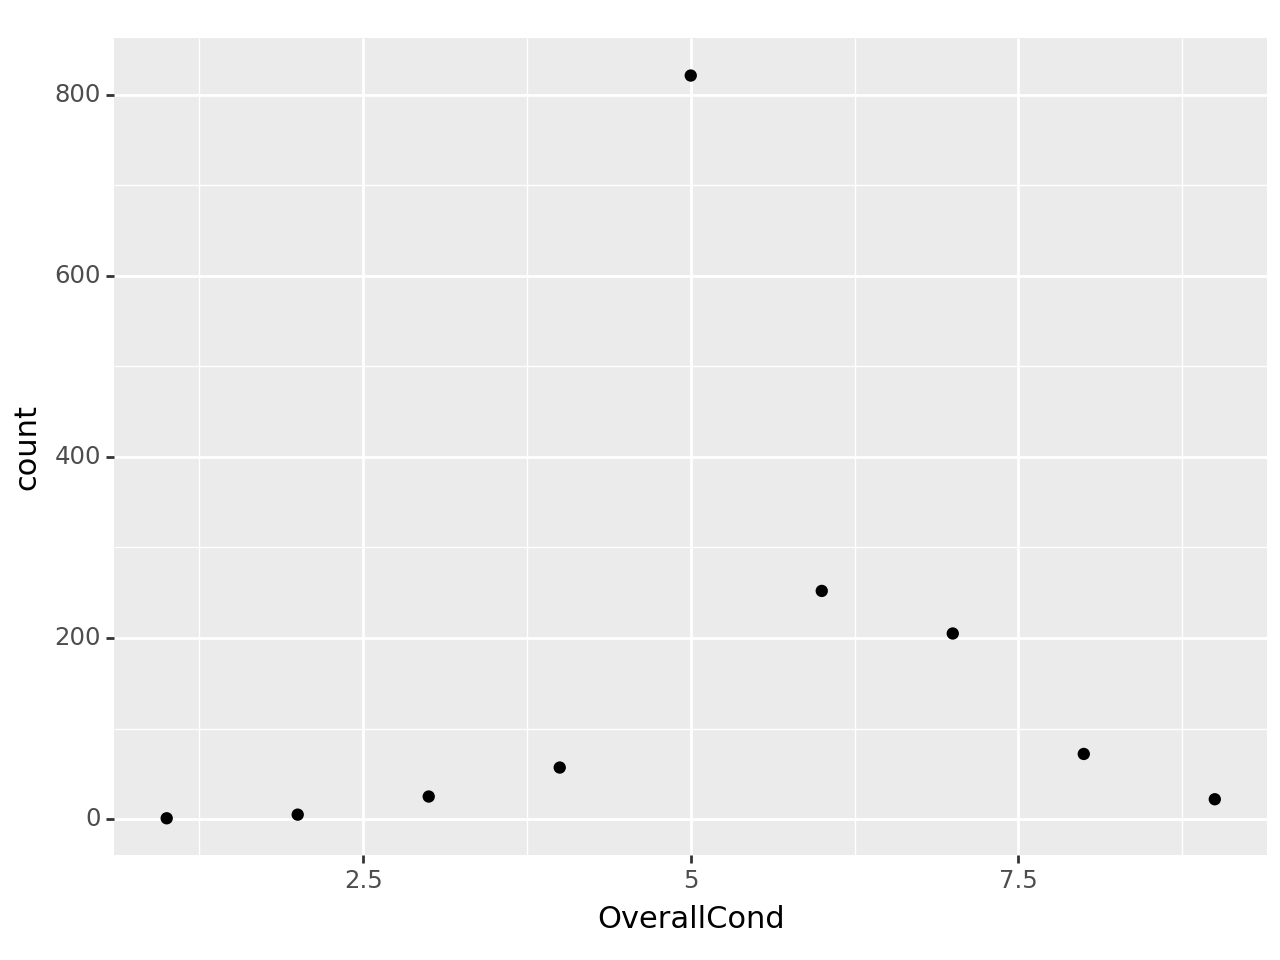

In [215]:
graph = (
        pn.ggplot(
            house_data_count,
            pn.aes(x=feature_to_check, y="count"),
        )
        + pn.geom_point()
)

graph.draw()

In [216]:
house_data_group_price = house_data.groupby(feature_to_check)["SalePrice"].mean().reset_index()
house_data_group_price

,OverallCond,SalePrice
0,1,61000.000000
1,2,141986.400000
2,3,101929.400000
3,4,120438.438596
4,5,203146.914738
5,6,153961.591270
6,7,158145.487805
7,8,155651.736111
8,9,216004.545455


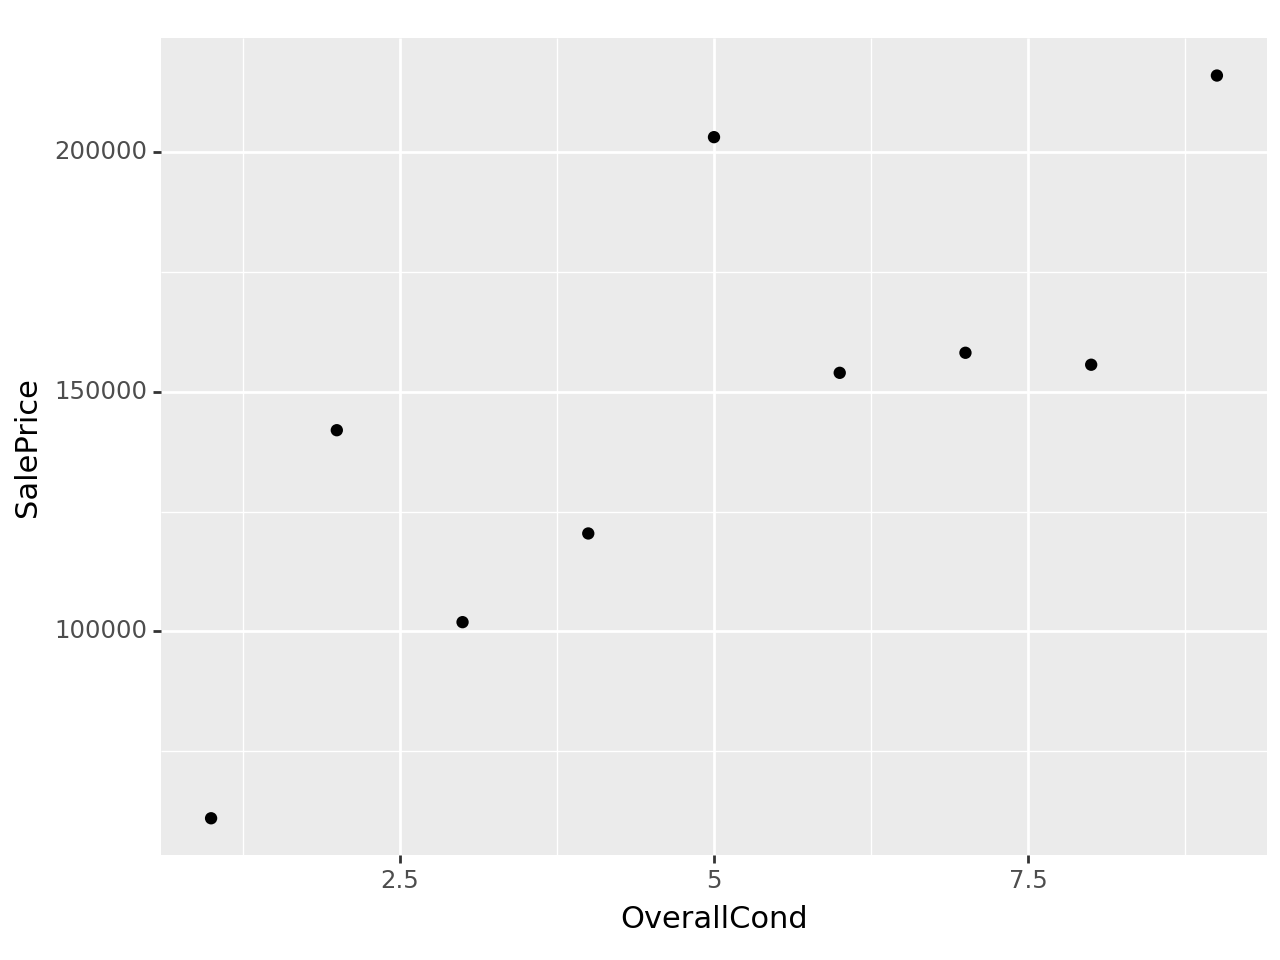

In [217]:
graph = (
        pn.ggplot(
            house_data_group_price,
            pn.aes(x=feature_to_check, y="SalePrice"),
        )
        + pn.geom_point()
)

graph.draw()

RANDOM STUFF

In [218]:
house_data_neighborhood = house_data.groupby('Neighborhood').agg(
    {"LotArea": ["mean"], "SalePrice": ["mean"]}).reset_index()
house_data_neighborhood = house_data_neighborhood.sort_values(by=('LotArea', 'mean'))
house_data_neighborhood

,Neighborhood,LotArea,SalePrice
,,mean,mean
1,Blueste,1625.000000,137500.000000
2,BrDale,1801.000000,104493.750000
10,MeadowV,2324.000000,98576.470588
13,NPkVill,3267.444444,142694.444444
0,Blmngtn,3398.176471,194870.882353
3,BrkSide,7360.413793,124834.051724
21,Somerst,7840.872093,225379.837209
9,IDOTRR,8109.162162,100123.783784
18,SWISU,8127.560000,142591.360000


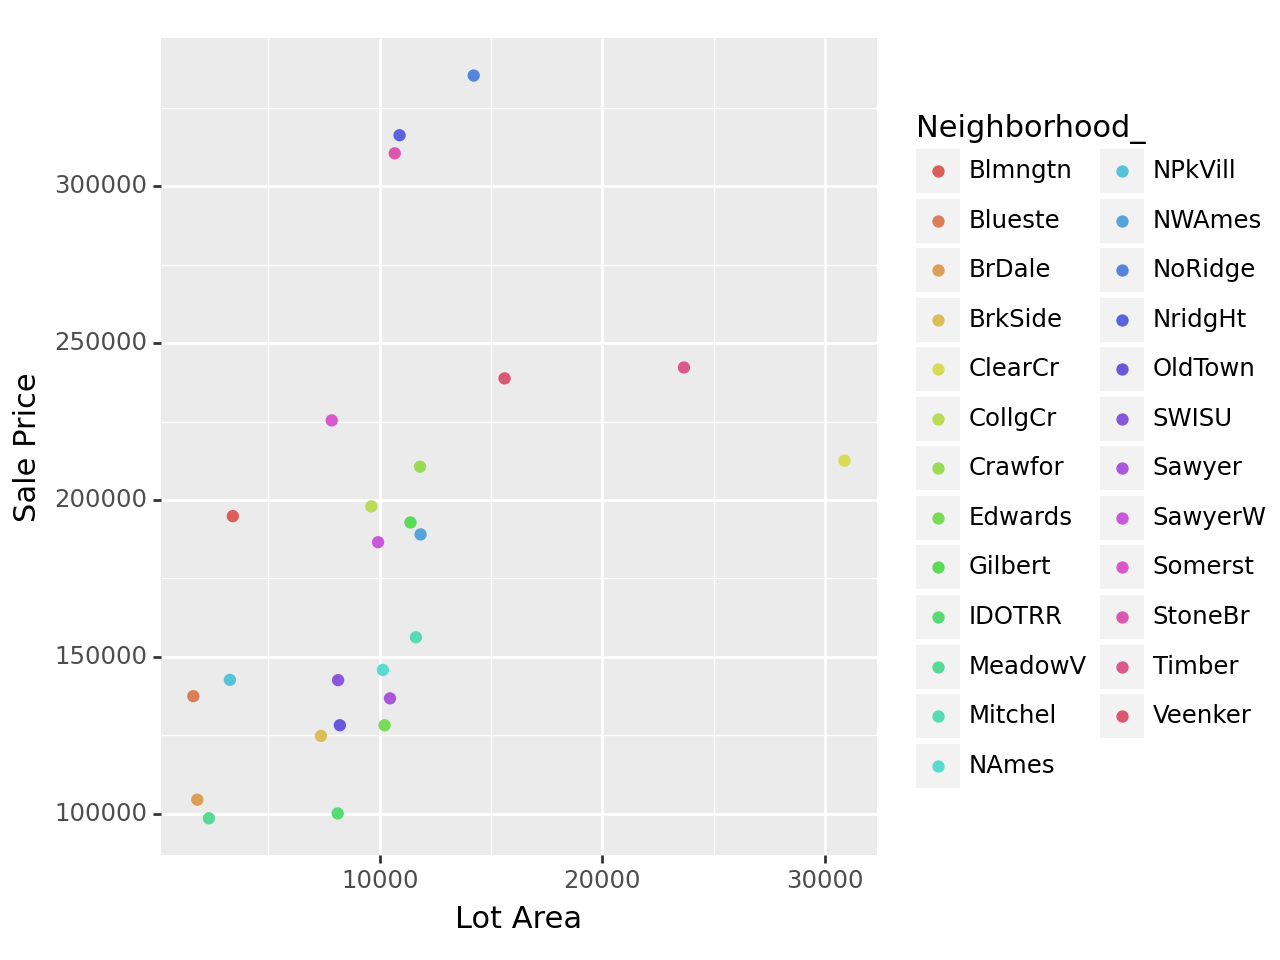

In [219]:
house_data_neighborhood.columns = ['_'.join(col) for col in house_data_neighborhood.columns]

graph = (
        pn.ggplot(house_data_neighborhood) +
        pn.aes(x='LotArea_mean', y='SalePrice_mean', color='Neighborhood_') +
        pn.geom_point() +
        pn.labs(x='Lot Area', y='Sale Price')
)

graph.draw()